# Netflix content Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
from wordcloud import WordCloud
warnings.filterwarnings('ignore')

# Khám phá dữ liệu

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)

## Đọc dữ liệu

In [3]:
df = pd.read_csv("netflix_titles.csv", header=0)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."


In [4]:
netflix = df.copy()
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."


In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
netflix.shape

(8807, 12)

## Kiểm tra dòng rỗng và trùng nhau

In [7]:
netflix.isna().mean()

show_id         0.000000
type            0.000000
title           0.000000
director        0.299080
cast            0.093675
country         0.094357
date_added      0.001135
release_year    0.000000
rating          0.000454
duration        0.000341
listed_in       0.000000
description     0.000000
dtype: float64

Có các dòng không có giá trị tại các cột `director`, `cast`, `country`, `date_added`, `rating` và `duration`, ta tiến hành loại bỏ các dòng không chứa giá trị ở bất kỳ cột nào, riêng cột `direction` có tỷ lệ sót khá nhiều nên sẽ thay thế bằng giá trị `None`

In [8]:
netflix['director'] = netflix['director'].fillna('No infomation')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
1,s2,TV Show,Blood & Water,No infomation,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
3,s4,TV Show,Jailbirds New Orleans,No infomation,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,s5,TV Show,Kota Factory,No infomation,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."


In [9]:
netflix.dropna(how='any', inplace=True)
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7290 entries, 1 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7290 non-null   object
 1   type          7290 non-null   object
 2   title         7290 non-null   object
 3   director      7290 non-null   object
 4   cast          7290 non-null   object
 5   country       7290 non-null   object
 6   date_added    7290 non-null   object
 7   release_year  7290 non-null   int64 
 8   rating        7290 non-null   object
 9   duration      7290 non-null   object
 10  listed_in     7290 non-null   object
 11  description   7290 non-null   object
dtypes: int64(1), object(11)
memory usage: 740.4+ KB


In [10]:
sum(netflix.duplicated())

0

Không có giá trị nào bị trùng trong dataframe `netflix`

## Chuyển cột `date_added` về dạng datetime

In [11]:
netflix['date_added'] = netflix['date_added'].str.strip().replace(', ', '-', regex=True)
netflix['date_added'] = netflix['date_added'].str.strip().replace(' ', '-', regex=True)
netflix['date_added']

1       September-24-2021
4       September-24-2021
7       September-24-2021
8       September-24-2021
9       September-24-2021
              ...        
8801         March-9-2016
8802     November-20-2019
8804      November-1-2019
8805      January-11-2020
8806         March-2-2019
Name: date_added, Length: 7290, dtype: object

In [12]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'], format='%B-%d-%Y')
netflix['date_added']

1      2021-09-24
4      2021-09-24
7      2021-09-24
8      2021-09-24
9      2021-09-24
          ...    
8801   2016-03-09
8802   2019-11-20
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 7290, dtype: datetime64[ns]

## Đếm các giá trị phân biệt ở mỗi cột

In [13]:
netflix.nunique()

show_id         7290
type               2
title           7290
director        3946
cast            7092
country          689
date_added      1630
release_year      72
rating            14
duration         206
listed_in        489
description     7277
dtype: int64

In [14]:
netflix.type.unique()

array(['TV Show', 'Movie'], dtype=object)

Nhận thấy `type` chỉ có 2 giá trị phân biệt, nên ta chia thành 2 dataframe nhỏ là `netflix_movie` và `netflix_tvshow`

In [15]:
netflix_movie = netflix[netflix.type == 'Movie']

In [16]:
netflix_tvshow = netflix[netflix.type == "TV Show"]

In [17]:
netflix_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5277 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5277 non-null   object        
 1   type          5277 non-null   object        
 2   title         5277 non-null   object        
 3   director      5277 non-null   object        
 4   cast          5277 non-null   object        
 5   country       5277 non-null   object        
 6   date_added    5277 non-null   datetime64[ns]
 7   release_year  5277 non-null   int64         
 8   rating        5277 non-null   object        
 9   duration      5277 non-null   object        
 10  listed_in     5277 non-null   object        
 11  description   5277 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 535.9+ KB


In [18]:
netflix_movie.duration.unique()

array(['125 min', '104 min', '127 min', '166 min', '103 min', '97 min',
       '106 min', '96 min', '124 min', '116 min', '98 min', '91 min',
       '115 min', '122 min', '99 min', '88 min', '100 min', '102 min',
       '93 min', '95 min', '85 min', '83 min', '182 min', '147 min',
       '90 min', '128 min', '143 min', '119 min', '114 min', '118 min',
       '108 min', '117 min', '121 min', '142 min', '113 min', '154 min',
       '120 min', '82 min', '94 min', '109 min', '101 min', '105 min',
       '86 min', '229 min', '76 min', '89 min', '110 min', '156 min',
       '112 min', '129 min', '107 min', '135 min', '136 min', '165 min',
       '150 min', '133 min', '145 min', '92 min', '64 min', '59 min',
       '111 min', '87 min', '148 min', '189 min', '141 min', '130 min',
       '68 min', '131 min', '126 min', '155 min', '123 min', '84 min',
       '13 min', '77 min', '61 min', '74 min', '49 min', '72 min',
       '78 min', '70 min', '132 min', '140 min', '81 min', '138 min',
       '1

In [19]:
netflix_tvshow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2013 entries, 1 to 8800
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       2013 non-null   object        
 1   type          2013 non-null   object        
 2   title         2013 non-null   object        
 3   director      2013 non-null   object        
 4   cast          2013 non-null   object        
 5   country       2013 non-null   object        
 6   date_added    2013 non-null   datetime64[ns]
 7   release_year  2013 non-null   int64         
 8   rating        2013 non-null   object        
 9   duration      2013 non-null   object        
 10  listed_in     2013 non-null   object        
 11  description   2013 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 204.4+ KB


In [20]:
netflix_tvshow.duration.unique()

array(['2 Seasons', '9 Seasons', '4 Seasons', '5 Seasons', '3 Seasons',
       '1 Season', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

## Đưa thời gian cột `duration` trong `netflix_movie` và `netflix_tvshow` về kiểu int 

In [21]:
netflix_movie.duration = netflix_movie.duration.replace("min", "", regex=True)
netflix_movie.duration

7       125 
9       104 
12      127 
24      166 
27      103 
        ... 
8801     96 
8802    158 
8804     88 
8805     88 
8806    111 
Name: duration, Length: 5277, dtype: object

In [22]:
netflix_movie.duration = netflix_movie.duration.astype("int64")
netflix_movie.duration.dtypes

dtype('int64')

In [23]:
netflix_tvshow.duration = netflix_tvshow.duration.replace(["Seasons", "Season"], "", regex=True)
netflix_tvshow.duration

1       2 
4       2 
8       9 
15      4 
17      2 
        ..
8780    1 
8795    2 
8796    2 
8797    3 
8800    1 
Name: duration, Length: 2013, dtype: object

In [24]:
netflix_tvshow.duration = netflix_tvshow.duration.astype("int64")
netflix_tvshow.duration.dtypes

dtype('int64')

# Đặt câu hỏi

1. Đâu là top 10 nước có số lượng phim nhiều nhất trên netflix?
2. Top 10 thể loại có nhiều bộ phim thuộc về nhất?
3. Thời điểm (tháng) nào trong năm có nhiều bộ phim được phát hành nhất?
4. Thống kê các loại rating ở các bộ phim và TV show?
5. Cho biết số lượng bộ phim, TV shows được phát hành trong mỗi năm thống kê? Dùng biểu đồ miền cho thấy sự tăng trưởng trực quan?
6. Thống kê thời lượng của các bộ phim trên netflix?
7. Thống kê tỷ lệ các mùa của các TV shows?
8. WordCloud cho thể loại TV shows?
9. Từng loại (type) cho các chương trình trên netflix chiếm tỉ trọng bao nhiêu trong 10 nước sản xuất nhiều nội dung nhất?

# Trả lời câu hỏi

## 1. Đâu là top 10 nước có số lượng phim nhiều nhất trên netflix?

**Explode cột country thành các quốc gia riêng rẽ**

In [25]:
top_10_country_movie = netflix_movie.assign(country=netflix_movie['country'].str.split(',')).explode('country')
top_10_country_movie['country'] = top_10_country_movie['country'].str.strip()
top_10_country_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri",United States,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri",Ghana,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri",Burkina Faso,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri",United Kingdom,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri",Germany,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past."


**Thống kê số lượng phim của top 10 sản xuất nhiều phim nhất trên Netflix**

In [26]:
top_10_country_movie = top_10_country_movie.groupby(['country'])['country'].count()
top_10_country_movie = pd.DataFrame(top_10_country_movie)
top_10_country_movie.columns = ['count']
top_10_country_movie = top_10_country_movie.sort_values(by='count', axis=0, ascending=False)
top_10_country_movie = top_10_country_movie[0:10]
top_10_country_movie

,count
country,
United States,2492
India,942
United Kingdom,476
Canada,295
France,285
Germany,168
Spain,156
Japan,114
China,108


In [27]:
top_10_country_movie.loc['India', 'count']

942

In [28]:
top_10_country_movie['count']

country
United States     2492
India              942
United Kingdom     476
Canada             295
France             285
Germany            168
Spain              156
Japan              114
China              108
Hong Kong          100
Name: count, dtype: int64

**Vẽ biểu đồ**

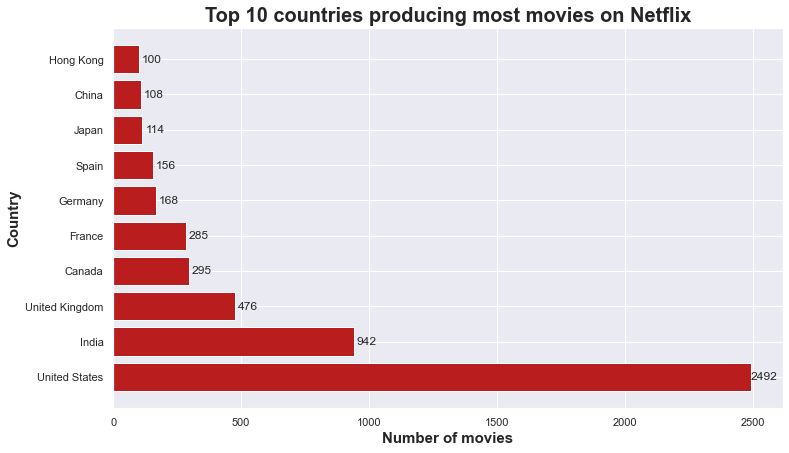

In [29]:
plt.figure(figsize=(12, 7), edgecolor='black');
sns.set_theme(style="darkgrid");
plt.barh(top_10_country_movie.index, top_10_country_movie['count'], color='#BA1D1D');
plt.ylabel("Country", fontweight='bold', fontsize=15);
plt.xlabel("Number of movies", fontweight='bold', fontsize=15);
plt.title("Top 10 countries producing most movies on Netflix", fontsize=20, fontweight='bold');

for i in top_10_country_movie.index:
    plt.annotate(top_10_country_movie.loc[i, 'count'], xy = (top_10_country_movie.loc[i, 'count'] + 50, i), va='center', ha='center');

Insight: từ top 10 quốc gia sản xuất nhiều phim nhất ta nhận thấy thống kê phản ánh đúng thực tế, các quốc gia này hầu hết đều có nền điện ảnh phát triển mạnh mẽ như Hollywood của USA, Bollywood của India, đồng thời cũng thấy được Netflix lựa chọn các nhà sản xuất phim Âu-Mỹ là chủ yếu

## 2. Top 10 thể loại có nhiều bộ phim thuộc về nhất?

**Explode cột list_in thành các thể loại riêng rẽ**

In [30]:
top_10_genre = netflix_movie.assign(genre=netflix_movie['listed_in'].str.split(",")).explode('genre')
top_10_genre['genre'] = top_10_genre['genre'].str.strip()
top_10_genre.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri","United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past.",Dramas
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri","United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past.",Independent Movies
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri","United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past.",International Movies
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta Devine, Ravi Kapoor",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contends with a feisty bird that's taken over her garden — and a husband who's struggling to find a way forward.,Comedies
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta Devine, Ravi Kapoor",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contends with a feisty bird that's taken over her garden — and a husband who's struggling to find a way forward.,Dramas


**Thống kê top 10 thể loại phim**

In [31]:
top_10_genre = pd.DataFrame(top_10_genre.groupby(['genre'])['genre'].count())
top_10_genre.columns = ['count']
top_10_genre = top_10_genre.sort_values('count', ascending=False)[0:10]
top_10_genre

,count
genre,
International Movies,2392
Dramas,2309
Comedies,1574
Action & Adventure,811
Independent Movies,742
Romantic Movies,583
Thrillers,549
Children & Family Movies,521
Documentaries,410


**Vẽ biểu đồ**

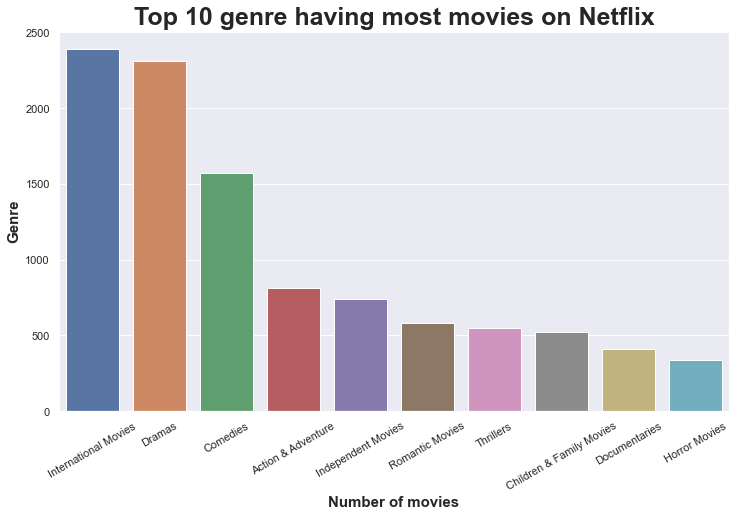

In [32]:
plt.figure(figsize=(12,7));
sns.set_theme(style="darkgrid");
top_10_genre_plot = sns.barplot(x=top_10_genre.index, y="count", data=top_10_genre, orient="v");
top_10_genre_plot.axes.set_title("Top 10 genre having most movies on Netflix", fontsize=25, fontweight='bold');
top_10_genre_plot.set_xlabel("Number of movies", fontsize=15, fontweight='bold');
top_10_genre_plot.set_ylabel("Genre", fontsize=15, fontweight='bold');
top_10_genre_plot.set_xticklabels(labels=top_10_genre.index, rotation=30);

Insight: từ top 10 thể loại phim được sản xuất nhiều nhất, ta nhận thấy phim quốc tế, phim truyền hình và hài kịch là được quan tâm sản xuất nhiều nhất, có thể dự đoán đây là thị hiếu của phần đông khán giả. Các nhà sản xuất sau này có thể cân nhắc ở các thể loại này để dễ dàng đạt được thành công hơn

## 3. Thời điểm (tháng) nào trong năm có nhiều bộ phim được phát hành nhất?

**Tạo cột `Month` để thực hiện thống kê theo tháng**

In [33]:
movie_on_month = netflix_movie.copy()
movie_on_month['Month'] = movie_on_month['date_added'].dt.month
movie_on_month.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri","United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past.",9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta Devine, Ravi Kapoor",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contends with a feisty bird that's taken over her garden — and a husband who's struggling to find a way forward.,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, Edin Hasanović, Anna Fialová, Marlon Boess, Victor Boccard, Fleur Geffrier, Aziz Dyab, Mélanie Fouché, Elizaveta Maximová","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies","After most of her family is murdered in a terrorist bombing, a young woman is unknowingly lured into joining the very group that killed them.",9
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi, Nassar",India,2021-09-21,1998,TV-14,166,"Comedies, International Movies, Romantic Movies","When the father of the man she loves insists that his twin sons marry twin sisters, a woman creates an alter ego that might be a bit too convincing.",9
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David Spade, Rob Schneider, Salma Hayek, Maria Bello, Maya Rudolph, Colin Quinn, Tim Meadows, Joyce Van Patten",United States,2021-09-20,2010,PG-13,103,Comedies,"Mourning the loss of their beloved junior high basketball coach, five middle-aged pals reunite at a lake house and rediscover the joys of being a kid.",9


**Đếm số bộ phim được phát hành trong từng tháng**

In [34]:
movie_on_month = pd.DataFrame(movie_on_month['Month'].value_counts().sort_index())
movie_on_month.columns = ['Number of movies']
movie_on_month

,Number of movies
1,494
2,337
3,460
4,469
5,360
6,409
7,456
8,438
9,424
10,483


**Vẽ biểu đồ**

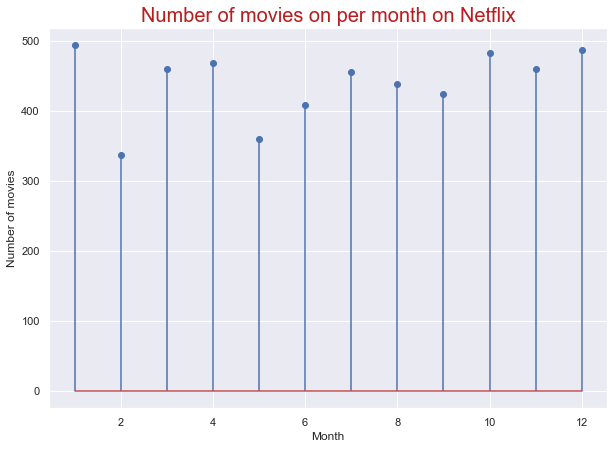

In [35]:
plt.figure(figsize=(10, 7));
plt.title("Number of movies on per month on Netflix", fontsize=20, color='#BA1D1D');
plt.ylabel("Number of movies");
plt.xlabel('Month');
plt.stem(movie_on_month.index, movie_on_month['Number of movies'], use_line_collection=True, linefmt='-');

Insight: các bộ phim được phát hành chủ yếu vào các tháng cuối năm như 10, 11, 12 và tháng 1 đầu năm, có lẽ đây là dịp xuất hiện nhiều kỳ nghỉ lễ nên các bộ phim phát hành giai đoạn này có thể thu hút nhiều người xem hơn

## 4. Thống kê tỷ lệ các loại ratings ở các bộ phim và TV shows?

**Thống kê các loại rating ở phim**

In [36]:
rating_movie = netflix_movie['rating'].value_counts().sort_index()
rating_movie

G             40
NC-17          3
NR            58
PG           275
PG-13        470
R            778
TV-14       1191
TV-G          90
TV-MA       1776
TV-PG        430
TV-Y          80
TV-Y7         80
TV-Y7-FV       3
UR             3
Name: rating, dtype: int64

**Thống kê các loại rating ở TV show**

In [37]:
rating_tv_show = - netflix_tvshow['rating'].value_counts().sort_index()
rating_tv_show

NR           -4
R            -1
TV-14      -564
TV-G        -68
TV-MA      -881
TV-PG      -223
TV-Y       -129
TV-Y7      -142
TV-Y7-FV     -1
Name: rating, dtype: int64

**Vẽ biểu đồ**

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


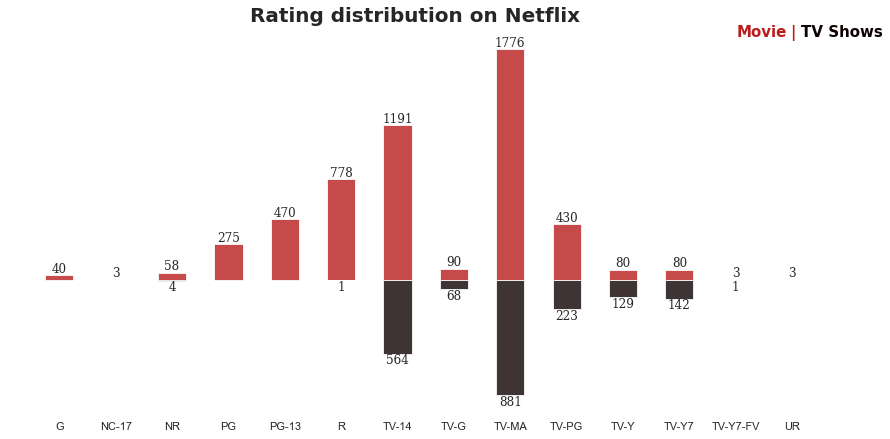

In [38]:
# Show bar chart
sns.set_theme(style="white");
fig, ax = plt.subplots(1, 1, figsize=(15, 7));
ax.bar(rating_movie.index, rating_movie, width=0.5, color='#BA1D1D', alpha=0.8, label='Movie');
ax.bar(rating_tv_show.index, rating_tv_show, width=0.5, color='#0E0101', alpha=0.8, label='TV Show');

# Show figures
for i in rating_movie.index:
    ax.annotate(rating_movie[i], xy = (i, rating_movie[i] + 50), va="center", ha='center', fontfamily='serif');
    
for i in rating_tv_show.index:
    ax.annotate(- rating_tv_show[i], xy = (i, rating_tv_show[i] - 50), va="center", ha='center', fontfamily='serif');

# Hidden the frame and yticks
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False);
    
ax.set_yticklabels([])
    
# Show title
fig.text(0.35, 0.9, "Rating distribution on Netflix", fontfamily='cursive', fontsize=20, fontweight='bold');

# Show legend
fig.text(0.8, 0.87, "Movie", color='#BA1D1D', fontfamily='cursive', fontsize=15, fontweight='bold');
fig.text(0.85, 0.87, "|", color='#BA1D1D', fontfamily='cursive', fontsize=15, fontweight='bold');
fig.text(0.86, 0.87, "TV Shows", color='#0E0101', fontfamily='cursive', fontsize=15, fontweight='bold');

Insight: hầu hết các loại rating ở các phim và TV show đều là TV-MA, TV-14 và TV-PG

## 5. Cho biết số lượng bộ phim, TV shows được phát hành trong mỗi năm thống kê? Dùng biểu đồ miền cho thấy sự tăng trưởng trực quan?

**Thống kê số phim trong từng năm**

In [39]:
year_movie = netflix_movie['date_added'].dt.year
year_movie = pd.DataFrame(year_movie.value_counts().sort_index())
year_movie

,date_added
2008,1
2009,2
2010,1
2011,13
2012,3
2013,6
2014,15
2015,47
2016,205
2017,710


**Thống kê số TV show trong từng năm**

In [40]:
year_tv_show = netflix_tvshow['date_added'].dt.year
year_tv_show = pd.DataFrame(year_tv_show.value_counts().sort_index())
year_tv_show

,date_added
2013,5
2014,5
2015,23
2016,153
2017,279
2018,290
2019,461
2020,476
2021,321


**Vẽ biểu đồ**

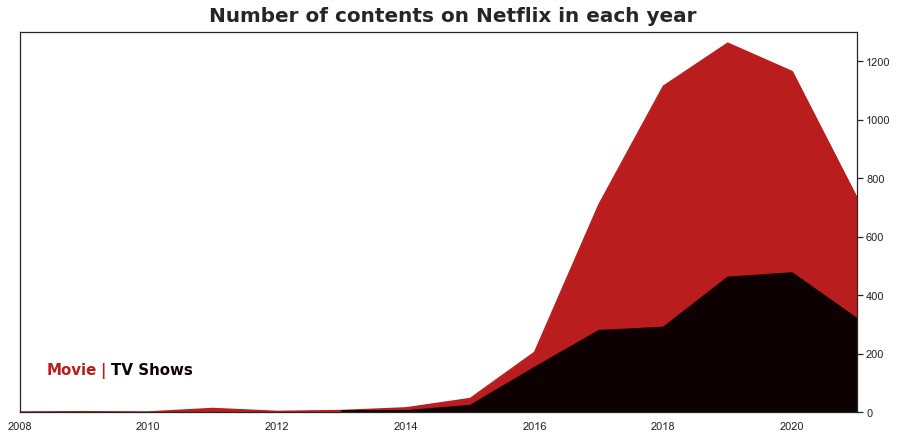

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

# Show chart
ax.plot(year_movie.index, year_movie, color="#BA1D1D", label="Movie");
ax.fill_between(year_movie.index, year_movie['date_added'], 0, color="#BA1D1D");
ax.plot(year_tv_show.index, year_tv_show, color="#0E0101", label="TV Show");
ax.fill_between(year_tv_show.index, year_tv_show['date_added'], 0, color="#0E0101");

ax.set_xlim(2008, 2021);
ax.set_ylim(0, 1300);
ax.yaxis.tick_right();

# Show title
fig.text(0.3, 0.9, "Number of contents on Netflix in each year", fontfamily='cursive', fontsize=20, fontweight='bold');

# Show legend
fig.text(0.15, 0.2, "Movie", color='#BA1D1D', fontfamily='cursive', fontsize=15, fontweight='bold');
fig.text(0.2, 0.2, "|", color='#BA1D1D', fontfamily='cursive', fontsize=15, fontweight='bold');
fig.text(0.21, 0.2, "TV Shows", color='#0E0101', fontfamily='cursive', fontsize=15, fontweight='bold');

Insight: số lượng các bộ phim và TV show có xu hướng tăng dần theo thời gian phù hợp với xu hướng xem phim tại gia và tiện lợi mau chóng của người xem, tuy nhiên từ năm 2020 số lượng có xu hướng giảm so với 2019, điều này có thể lí giải vì nguyên nhân dịch COVID hoành hành khắp thế giới

## 6. Thống kê thời lượng của các bộ phim trên netflix?

**Thống kê tần suất của từng thời lượng phim**

In [42]:
movie_duration = netflix_movie['duration'].value_counts().sort_index()
movie_duration

8        1
10       1
12       2
13       1
14       1
15       2
17       1
18       1
20       1
22       8
23       4
24      18
25       5
26       5
27       3
28       6
29       7
30       4
31       2
32       4
33       6
35       1
36       1
37       1
38       1
40       3
41       1
42       6
43       1
44      13
45       7
46      21
47       8
48       4
49       4
50       7
51       8
52      11
53      19
54      18
55      12
56       9
57      11
58      17
59      16
60      22
61      23
62      19
63      21
64      16
65      14
66      22
67      14
68      14
69      19
70      20
71      23
72      29
73      20
74      25
75      28
76      19
77      21
78      34
79      26
80      34
81      54
82      38
83      57
84      51
85      63
86      88
87      80
88     101
89      95
90     126
91     118
92     109
93     130
94     136
95     130
96     110
97     130
98     109
99     107
100     93
101    104
102    113
103    103
104     99
105     90

**Vẽ biểu đồ**

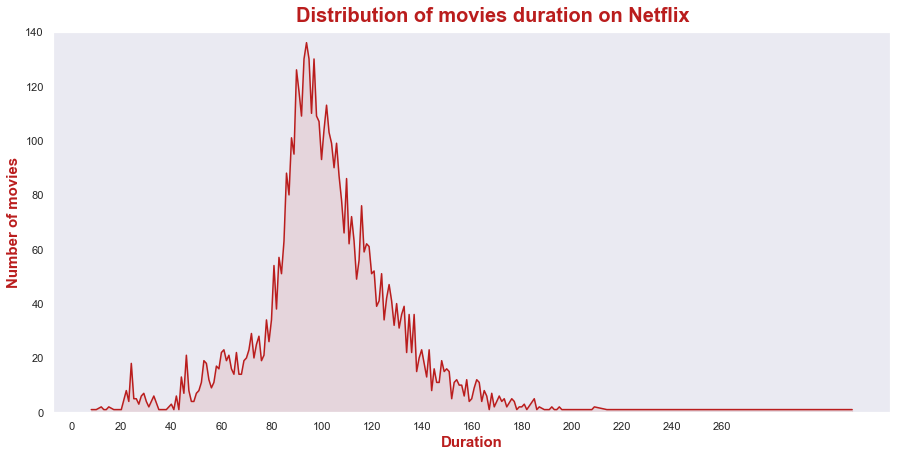

In [43]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(1, 1, figsize=(15, 7));
ax.plot(movie_duration.index, movie_duration, color='#BA1D1D');
ax.fill_between(movie_duration.index, movie_duration, 0, color='#BA1D1D', alpha=0.1);

ax.set_xticks(range(0, 280, 20));
ax.set_xlabel('Duration', color='#BA1D1D', fontweight='bold', fontsize=15);
ax.set_ylabel('Number of movies', color='#BA1D1D', fontweight='bold', fontsize=15);
ax.set_ylim(0, 140);
ax.grid(False);

fig.text(0.35, 0.9, "Distribution of movies duration on Netflix", color='#BA1D1D', fontsize=20, fontweight='bold');

Insight: hầu hết các bộ phim đều có thời lượng chủ yếu ở khoảng 90-110 phút, thời lượng này vừa đủ truyền tải nội dung bộ phim vừa giúp khán giả dễ dàng theo dõi phim mà không bị chán. Những nhà làm phim sau này có thể dựa vào đó để thực hiện bộ phim của mình sao cho vừa đủ kinh phí mà vẫn đảm bảo khả năng thành công

## 7. Thống kê tỷ lệ các mùa của các TV show?

**Đếm số lượng các show của từng loại mùa**

In [44]:
season_tv_show = netflix_tvshow['duration'].value_counts().sort_values(ascending=False)
season_tv_show

1     1252
2      348
3      169
4       90
5       63
6       32
7       22
8       15
9        8
10       6
12       2
13       2
15       2
11       1
17       1
Name: duration, dtype: int64

**Cộng những mùa có số lượng show < 30 sau đó loại bỏ chúng**

In [45]:
season_tv_show['others'] = season_tv_show[season_tv_show.values < 30].sum()
season_tv_show

1         1252
2          348
3          169
4           90
5           63
6           32
7           22
8           15
9            8
10           6
12           2
13           2
15           2
11           1
17           1
others      59
Name: duration, dtype: int64

In [46]:
season_tv_show = season_tv_show[season_tv_show.values > 30]
season_tv_show

1         1252
2          348
3          169
4           90
5           63
6           32
others      59
Name: duration, dtype: int64

**Vẽ biểu đồ**

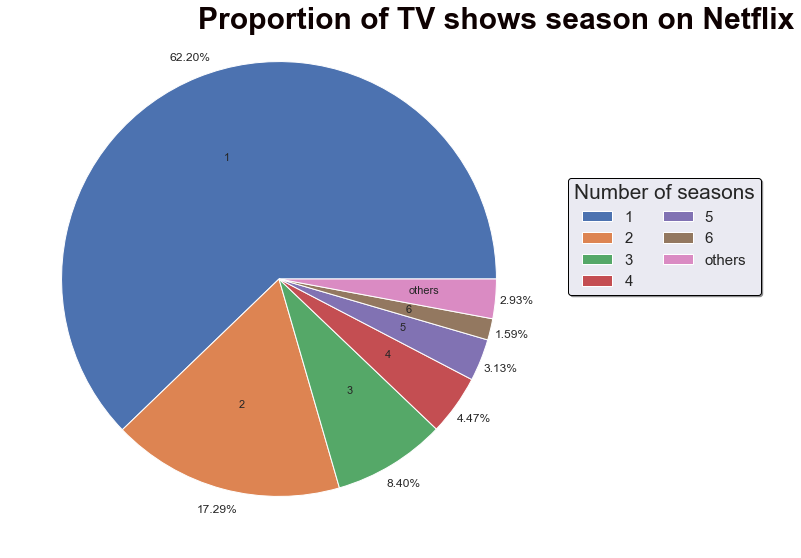

In [47]:
fig, ax = plt.subplots(1, 1);
fig.set_figheight(10);
fig.set_figwidth(10);
myexplode=[0.05, 0, 0.05, 0, 0.05, 0, 0, 0.05, 0, 0.05]
ax.pie(season_tv_show, labels=season_tv_show.index, autopct="%1.2f%%", pctdistance=1.1, labeldistance=0.6);
ax.legend(loc='best', bbox_to_anchor=(0.5, 0.2, 0.9, 0.5), fontsize=15, ncol=2, shadow=True, edgecolor='black',
         title="Number of seasons", title_fontsize='xx-large');

fig.text(0.4, 0.85, "Proportion of TV shows season on Netflix", color='#0E0101', fontsize=30, fontweight='bold');

Insight: hầu hết các TV Show đều duy trì số lượng là 1 mùa, số lượng mùa càng lớn càng có ít TV Show sản xuất, điều này phản ánh các show chưa đủ sức hút để xây dựng thêm nhiều mùa cho khán giả thưởng thức

## 8. WordCloud cho thể loại TV shows?

**Explode thành những thể loại riêng biệt**

In [48]:
genre_tv_show = netflix_tvshow.assign(genre=netflix_tvshow['listed_in'].str.split(",")).explode('genre')
genre_tv_show['genre'] = genre_tv_show['genre'].str.strip()

**Lấy ra danh sách các thể loại**

In [49]:
text = genre_tv_show['genre'].to_list()
text

['International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'International TV Shows',
 'Romantic TV Shows',
 'TV Comedies',
 'British TV Shows',
 'Reality TV',
 'TV Comedies',
 'TV Dramas',
 'Crime TV Shows',
 'Spanish-Language TV Shows',
 'TV Dramas',
 'International TV Shows',
 'TV Action & Adventure',
 'TV Dramas',
 'Docuseries',
 'International TV Shows',
 'Reality TV',
 'British TV Shows',
 'International TV Shows',
 'TV Comedies',
 "Kids' TV",
 'TV Comedies',
 "Kids' TV",
 "Kids' TV",
 'TV Sci-Fi & Fantasy',
 'International TV Shows',
 'TV Dramas',
 'International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Reality TV',
 "Kids' TV",
 "Kids' TV",
 'TV Comedies',
 'British TV Shows',
 'Docuseries',
 'International TV Shows',
 'Anime Series',
 'International TV Shows',
 'Crime TV Shows',
 'TV Comedies',
 'TV Dramas',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Reality TV',
 "Kids' TV",
 'TV Comedies',
 'TV Sci-Fi & Fantasy',
 'British TV Shows',
 "Kids' TV",
 '

**Vẽ biểu đồ**

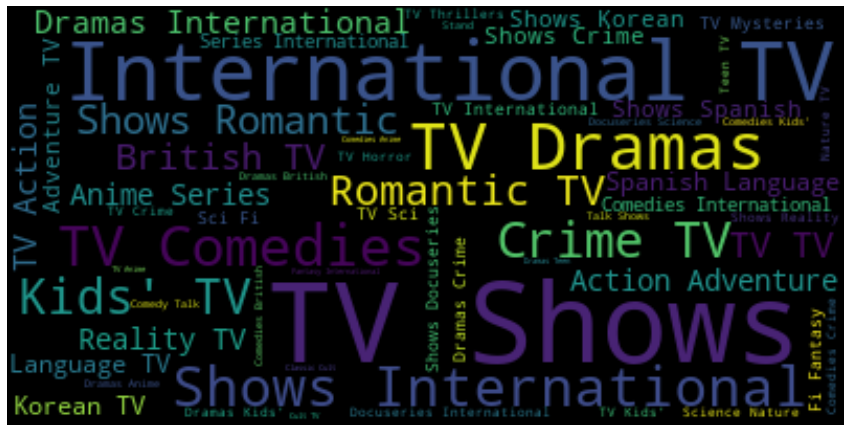

In [50]:
wordcloud = WordCloud().generate(' '.join(text));
plt.figure(figsize=(15, 10));
plt.imshow(wordcloud, interpolation='bilinear');
plt.axis("off");
plt.margins(x=0, y=0);
plt.show();

Insight: thông qua wordcloud, ta nhận ra các thể loại TV Shows, International TV, Dramas, Shows International được ưa chuộng hơn cả. Dựa vào đây các nhà sản xuất có thể linh động trong việc sản xuất các nội dung để thu hút người xem

## 9. Từng loại (type) cho các chương trình trên netflix chiếm tỉ trọng bao nhiêu trong 10 nước sản xuất nhiều nội dung nhất?

In [51]:
country_content = netflix.assign(country=netflix['country'].str.split(',')).explode('country')
country_content['country'] = country_content['country'].str.strip()
country_content = country_content[['country', 'type']]
country_content.head()

,country,type
1,South Africa,TV Show
4,India,TV Show
7,United States,Movie
7,Ghana,Movie
7,Burkina Faso,Movie


**Tìm top 10 quốc gia sản xuất ra nhiều nội dung nhất trên Netflix**

In [52]:
top_10_country_content = country_content['country'].value_counts().sort_values(ascending=False)
top_10_country_content[:10]

United States     3274
India             1007
United Kingdom     708
Canada             414
France             361
Japan              307
South Korea        227
Spain              209
Germany            207
China              156
Name: country, dtype: int64

**Lấy thông tin của 10 quốc gia sản xuất nhiều nội dung nhất trên Netflix**

In [53]:
list_countries = ['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan', 'South Korea', 'Spain', 'Germany', 'China']
top_10_country_content = country_content[country_content['country'].isin(list_countries)]
top_10_country_content

,country,type
4,India,TV Show
7,United States,Movie
7,United Kingdom,Movie
7,Germany,Movie
8,United Kingdom,TV Show
...,...,...
8799,India,Movie
8802,United States,Movie
8804,United States,Movie
8805,United States,Movie


**Tạo dataframe đếm số lượng movie của top 10 quốc gia sản xuất nhiều nội dung nhất trên Netflix**

In [54]:
top_10_country_content_movie = top_10_country_content[top_10_country_content['type'] == 'Movie'].value_counts().sort_values().unstack()
# top_10_country_content_movie = top_10_country_content_movie.sort_values('Movie', ascending=False)
top_10_country_content_movie = top_10_country_content_movie.reindex(['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan', 'South Korea', 'Spain', 'Germany', 'China'])
top_10_country_content_movie

type,Movie
country,
United States,2492
India,942
United Kingdom,476
Canada,295
France,285
Japan,114
South Korea,59
Spain,156
Germany,168


In [55]:
top_10_country_content_movie.loc['India', 'Movie']

942

In [56]:
top_10_country_content_movie.loc[:, 'Movie'].sum()

5095

**Tạo dataframe đếm số lượng tv show của top 10 quốc gia sản xuất nhiều nội dung nhất trên Netflix**

In [57]:
top_10_country_content_tvshow = top_10_country_content[top_10_country_content['type'] == 'TV Show'].value_counts().sort_values().unstack()
# top_10_country_content_tvshow = top_10_country_content_tvshow.sort_values('TV Show', ascending=False)
top_10_country_content_tvshow = top_10_country_content_tvshow.reindex(['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan', 'South Korea', 'Spain', 'Germany', 'China'])
top_10_country_content_tvshow

type,TV Show
country,
United States,782
India,65
United Kingdom,232
Canada,119
France,76
Japan,193
South Korea,168
Spain,53
Germany,39


**Vẽ biểu đồ**

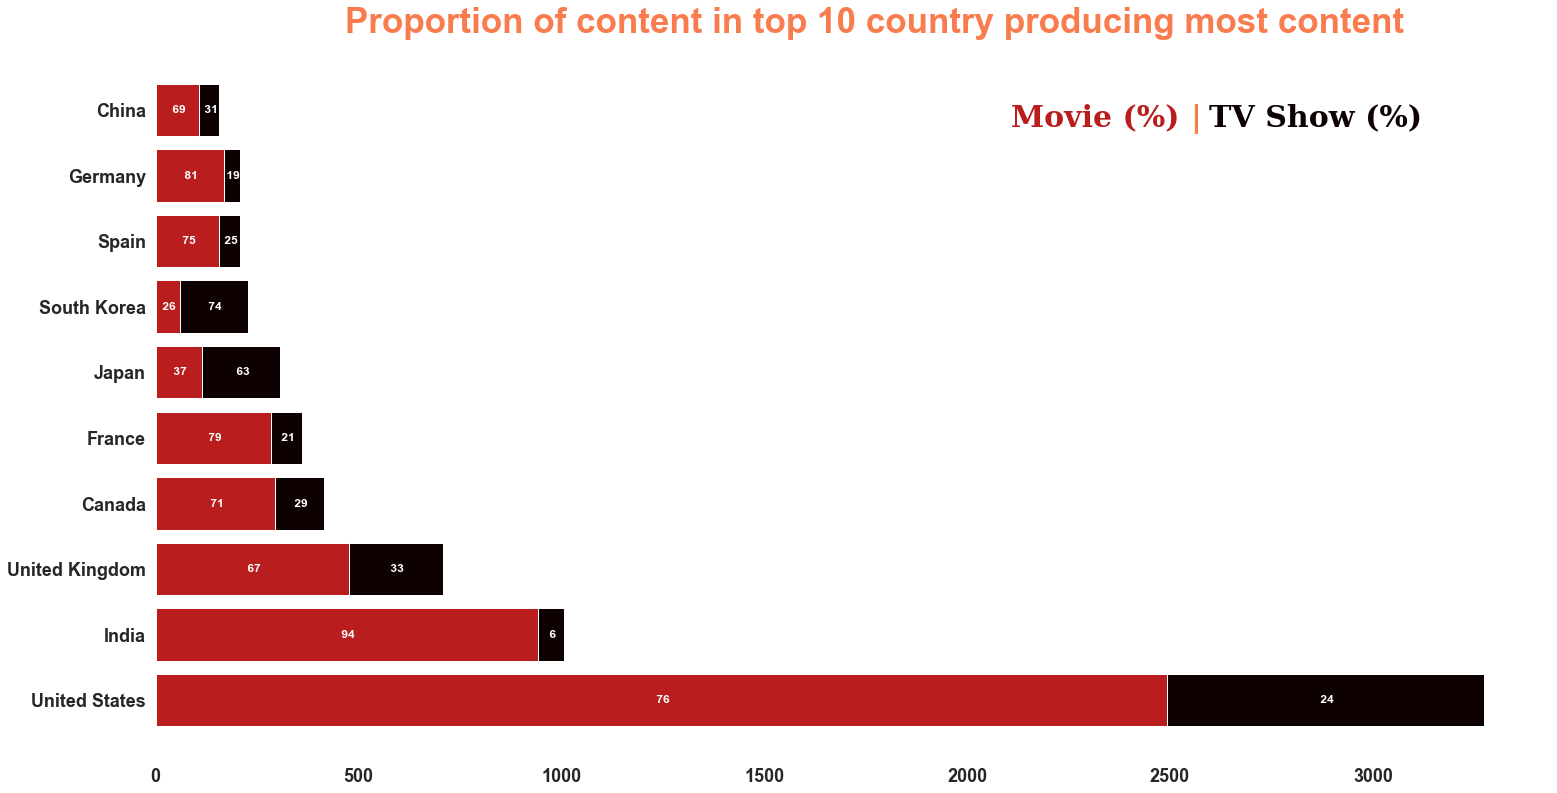

In [58]:
sns.set_theme(style='white');
fig, ax = plt.subplots(1, 1, figsize=(25, 13));
ax.barh(top_10_country_content_movie.index, top_10_country_content_movie['Movie'], color="#BA1D1D");
ax.barh(top_10_country_content_tvshow.index, top_10_country_content_tvshow['TV Show'], 
        left=top_10_country_content_movie['Movie'], color='#0E0101');

# Show figure
for i in top_10_country_content_movie.index:
    ax.annotate(f"{top_10_country_content_movie.loc[i, 'Movie']/(top_10_country_content_movie.loc[i, 'Movie']+top_10_country_content_tvshow.loc[i, 'TV Show'])*100: .0f}", 
                xy = (top_10_country_content_movie.loc[i, 'Movie']/2, i), 
                color='#FFFFFF', va='center', ha='center', fontweight='bold');
    
for i in top_10_country_content_tvshow.index:
    ax.annotate(f"{top_10_country_content_tvshow.loc[i, 'TV Show']/(top_10_country_content_tvshow.loc[i, 'TV Show'] + top_10_country_content_movie.loc[i, 'Movie'])*100: .0f}", 
                xy = (top_10_country_content_tvshow.loc[i, 'TV Show']/2 + top_10_country_content_movie.loc[i, "Movie"], i), 
                color='#FFFFFF', va='center', ha='center', fontweight='bold');
    
# Show title, legend and axis
fig.text(0.23, 0.9, "Proportion of content in top 10 country producing most content", color='#F97C4F', fontsize=35, fontweight='bold');
fig.text(0.6, 0.8, "Movie (%)", color='#BA1D1D', fontweight='bold', fontsize=30, fontfamily='serif');
fig.text(0.7, 0.8, "|", color='#F97C4F', fontweight='bold', fontsize=30, fontfamily='serif');
fig.text(0.71, 0.8, "TV Show (%)", color='#0E0101', fontweight='bold', fontsize=30, fontfamily='serif');
ax.set_yticklabels(top_10_country_content_movie.index, fontsize=18, fontweight='bold');
ax.set_xticklabels(range(0, 4000, 500), fontsize=18, fontweight='bold');

# Hidden frame
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

Insight: Trong 10 quốc gia sản xuất nhiều nội dung nhất trên Netflix, hầu hết các quốc gia đều sản xuất Movie nhiều hơn TV Show ngoại trừ Hàn Quốc. Thông qua insight chúng ta có thể thấy được thế mạnh của mỗi quốc gia ở lĩnh vực sản xuất nội dung, vì rõ ràng nội dung nào ưu thế thì mới được Netflix đưa vào kho nội dung.